In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Inserting the EV_Population_data 

In [2]:
ev_data = pd.DataFrame(pd.read_csv('Electric_Vehicle_Population_Data.csv'))
ev_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [3]:
ev_data.shape

(177866, 17)

In [4]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [5]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

There are missing data in the county,city,Postal code, Legislative District, Vehicle location, Electric utility, 2020 Census Tract
So we need to preprocess the dataset:

In [6]:
# Dropna drops/delete the rows containing the missing Value the 
Ev_cleaned= pd.DataFrame(ev_data.dropna())


In [7]:
Ev_cleaned.shape

(177473, 17)

For the task of market size of electric vehicles analysis, we can explore the following areas:

1. EV Adoption Over Time: Analyze the growth of the EV population by model year.
2. Geographical Distribution: Understand where EVs are most commonly registered (e.g., by county or city).
3. EV Types: Breakdown of the dataset by electric vehicle type (BEV, etc.).
4. Make and Model Popularity: Identify the most popular makes and models among the registered EVs.
5. Electric Range Analysis: Analyze the electric range of vehicles to see how EV technology is progressing.
6. Estimated Growth in Market Size: Analyze and find the estimated growth in the market size of electric vehicles.


#### 1.  Let’s start with analyzing the EV Adoption Over Time by visualizing the number of EVs registered by model year. It will give us an insight into how the EV population has grown over the years:

C:\Users\arjun\AppData\Local\Temp\ipykernel_10104\3637891166.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="plasma")


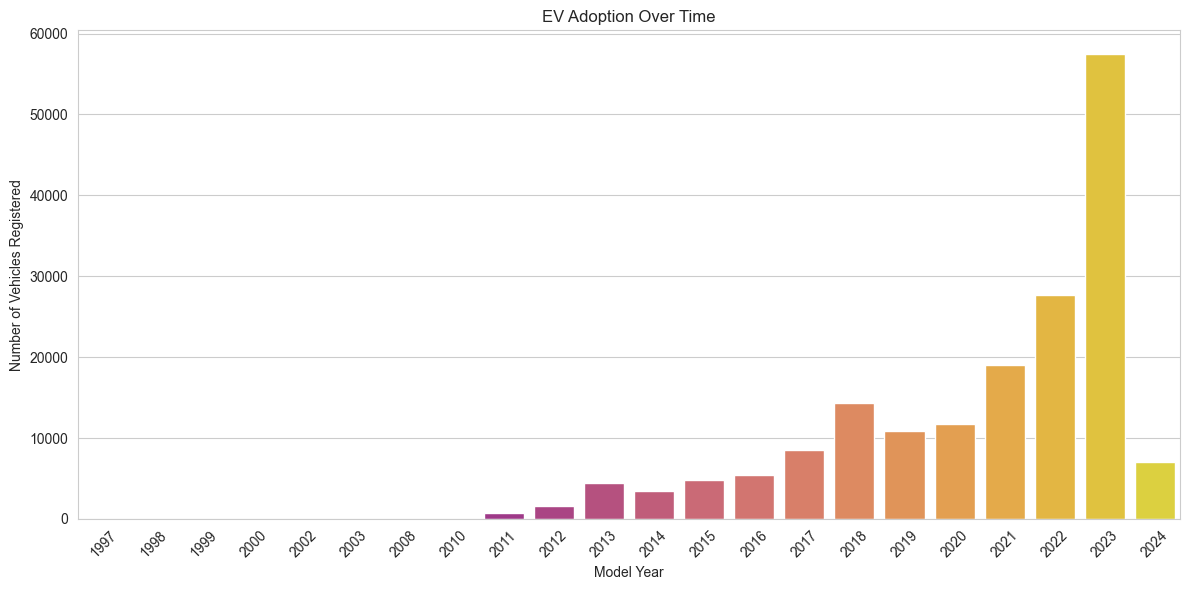

In [8]:
# EV Adoption Over Time
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))

# # Count the number of EVs by model year and sort by year
ev_adoption_by_year = Ev_cleaned['Model Year'].value_counts().sort_index()

# Create a barplot
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="plasma")

# customization of the barplot 
plt.title('EV Adoption Over Time') 
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')

# rotate the x axis for  better readability 
plt.xticks(rotation=45)
plt.tight_layout()
# To show the graph 
plt.show()

#### From the above bar chart, it’s clear that EV adoption has been increasing over time, especially a significant upward trend starting from 2016 ownwards. The number of vehicles registered grows modestly up until that point and then begins to rise more rapidly from 2017 onwards. The year 2023 shows a particularly sharp increase in the number of registered EVs, with the bar for 2023 being the highest on the graph, indicating a peak in EV adoption. *** Note that the data of 2024 is not complete thus showing a lower value bar in comparision.

##### 2.Let’s start by selecting the top 3 counties based on EV registrations and then analyze the distribution of EVs within the cities of those counties:

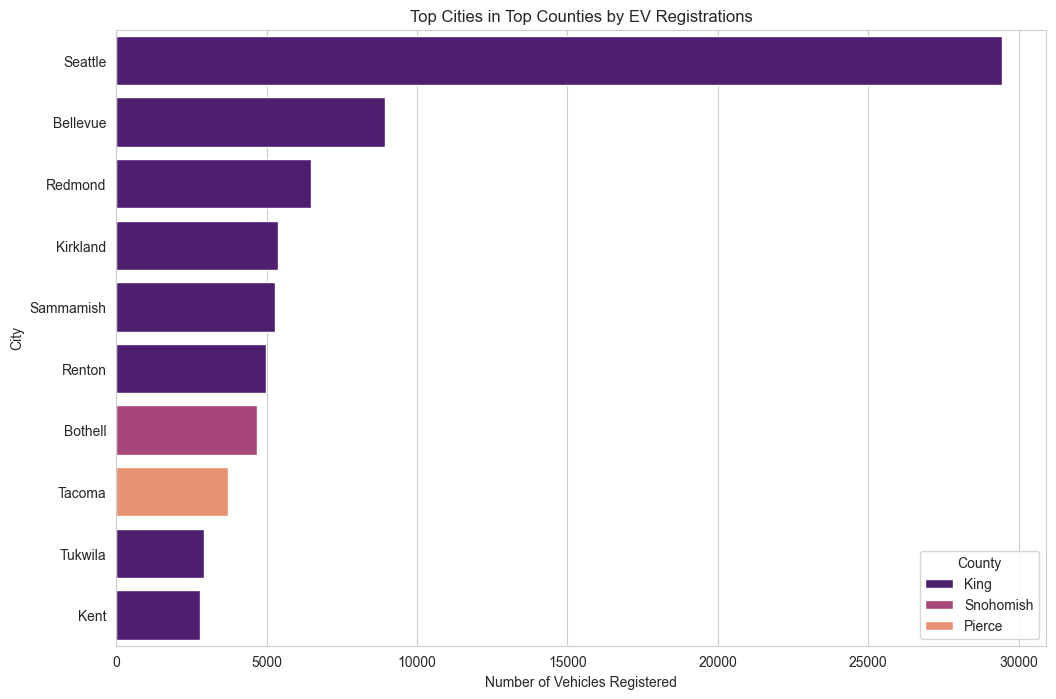

In [9]:
# geographical distribution at county level and filtering the top 3 
ev_county_distribution = Ev_cleaned['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

# filtering the dataset for these top counties
top_counties_data = Ev_cleaned[Ev_cleaned['County'].isin(top_counties)]

# analyzing the distribution of EVs within the cities of these top counties
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)

plt.figure(figsize=(12, 8))

# Create a barplot
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="magma")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.show()

In [10]:
# Define the city you are interested in
city_name = "Sammamish"

# Filter the DataFrame to get the county for the specified city
city_data = top_counties_data[top_counties_data['City'] == city_name]

# Check the result
print(city_data[['County', 'City']])


       County       City
264      King  Sammamish
272      King  Sammamish
289      King  Sammamish
327      King  Sammamish
361      King  Sammamish
...       ...        ...
177570   King  Sammamish
177629   King  Sammamish
177670   King  Sammamish
177681   King  Sammamish
177795   King  Sammamish

[5280 rows x 2 columns]


In [11]:
# Define the city you are interested in
city_name = "Sammamish"

# Filter the DataFrame to get the county for the specified city
city_data = top_counties_data[top_counties_data['City'] == city_name]

# Get unique county-city combinations
unique_city_data = city_data[['County', 'City']].drop_duplicates()

# Check the result
print(unique_city_data)

# Optionally, check the number of unique counties for the city
unique_counties = unique_city_data['County'].nunique()
print(f"The city {city_name} belongs to {unique_counties} unique county(ies).")


    County       City
264   King  Sammamish
The city Sammamish belongs to 1 unique county(ies).


##### Inferences: The top 3 countiies being  King, Snohomish, and Pierce. The horizontal bars represent cities, and their length corresponds to the number of vehicles registered, colour-coded by county. Here are the key findings from the above graph:
- Seattle, which is in King County, has the highest number of EV registrations by a significant margin than other listed. Followed by Bellevue and Redmond, also in King County.
- Cities in Snohomish County, such as Kirkland show moderate EV registrations.
- Tacoma representing Pierce County, have the fewest EV registrations among the cities listed
- The majority of cities shown are from King County, which seems to dominate EV registrations among the three counties.


##### Next, let’s explore the types of electric vehicles represented in this dataset. Understanding the breakdown between different EV types, such as Battery Electric Vehicles (BEV) and Plug-in Hybrid Electric Vehicles (PHEV), can provide insights into consumer preferences and the adoption patterns of purely electric vs. hybrid electric solutions. So, let’s visualize the distribution of electric vehicle types to see which categories are most popular among the registered vehicles:



C:\Users\arjun\AppData\Local\Temp\ipykernel_10104\3775345780.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_type_distribution.index, y=ev_type_distribution.values, palette="rocket")


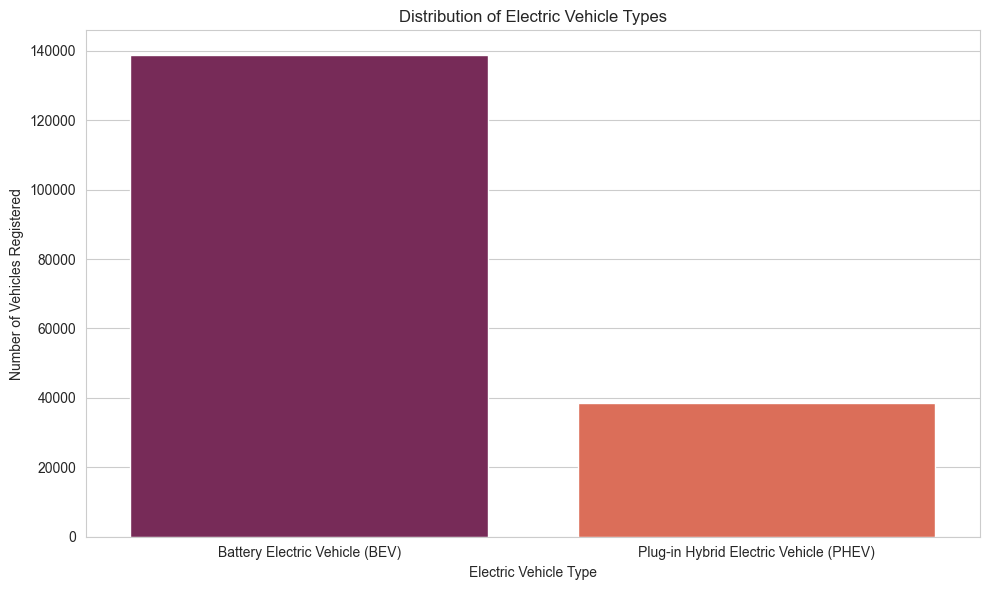

In [12]:
# analyzing the distribution of electric vehicle Types
ev_type_distribution = Ev_cleaned['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=ev_type_distribution.index, y=ev_type_distribution.values, palette="rocket")
plt.title('Distribution of Electric Vehicle Types')
plt.ylabel('Number of Vehicles Registered')
plt.xlabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

#### Inference: BEV is more popular amoong the people over PHEV in United States.
 Let’s now focus on the popularity of electric vehicle manufacturers and models among the registered vehicles. This analysis will help us identify which manufacturers and specific models dominate the EV market, potentially indicating consumer preferences, brand loyalty, and the success of various manufacturers’ strategies in promoting electric mobility. So, let’s have a look at the most popular manufacturers and then drill down into the most popular models within those manufacturers:

C:\Users\arjun\AppData\Local\Temp\ipykernel_10104\584253446.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="RdYlGn")


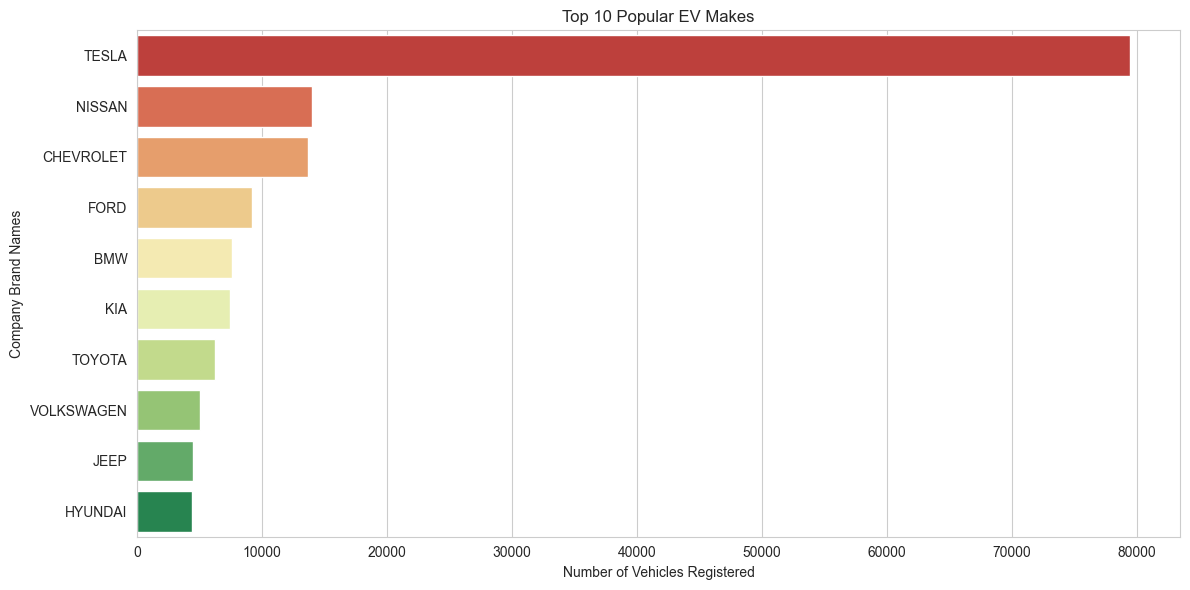

In [13]:
# analyzing the popularity of EV manufacturers
ev_make_distribution = Ev_cleaned['Make'].value_counts().head(10)  # Limiting to top 10 for clarity

plt.figure(figsize=(12, 6))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="RdYlGn")
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Company Brand Names')
plt.tight_layout()
plt.show()

##### Inference: TESLA leads by substantial margin with highest number of vehicles, followed by NISSAN, CHEVROLET. 

- Next, let’s drill down into the most popular models within these top manufacturers to get a more detailed understanding of consumer preferences at the model level:

         Make         Model  Number of Vehicles
0       TESLA       MODEL Y               35989
1       TESLA       MODEL 3               30092
2      NISSAN          LEAF               13366
3       TESLA       MODEL S                7735
4   CHEVROLET       BOLT EV                6821
5       TESLA       MODEL X                5796
6   CHEVROLET          VOLT                4796
7   CHEVROLET      BOLT EUV                1772
8      NISSAN         ARIYA                 632
9   CHEVROLET         SPARK                 241
10      TESLA      ROADSTER                  47
11  CHEVROLET  SILVERADO EV                  33
12  CHEVROLET     BLAZER EV                  14
13  CHEVROLET   S-10 PICKUP                   1


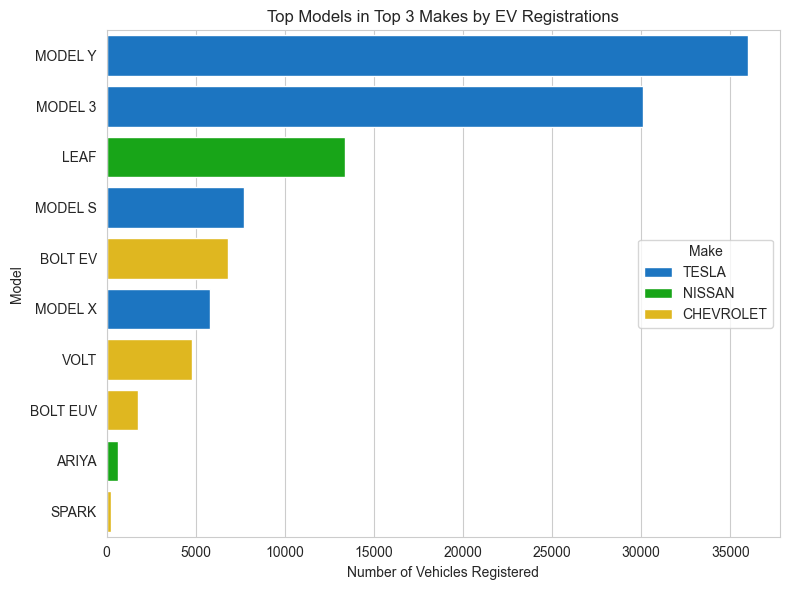

In [14]:
# selecting the top 3 manufacturers based on the number of vehicles registered
top_3_makes = ev_make_distribution.head(3).index

# filtering the dataset for these top manufacturers
top_makes_data = ev_data[ev_data['Make'].isin(top_3_makes)]

# analyzing the popularity of EV models within these top manufacturers
ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')
print(ev_model_distribution_top_makes)

# visualizing the top 10 models across these manufacturers for clarity
top_models = ev_model_distribution_top_makes.head(10)

plt.figure(figsize=(8, 6))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="nipy_spectral")
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()



##### Inferences: TESLA’s MODEL Y and MODEL 3 are the most registered vehicles, with MODEL Y having the highest number of registrations, followed by NISSAN’s LEAF is the third most registered model and the most registered non-TESLA vehicle. CHEVROLET’s BOLT EV and VOLT are the next in the ranking with considerable registrations, followed by BOLT EUV.

#### One of the feature that one should target is range of vehicles, which is a critical factor for analyzing the market size of electric vehicles. The electric range indicates how far an EV can travel on a single charge, and advancements in battery technology have been steadily increasing these ranges over the years. So, let’s look at the distribution of electric ranges in the dataset and identify any notable trends, such as improvements over time or variations between different vehicle types or manufacturers:



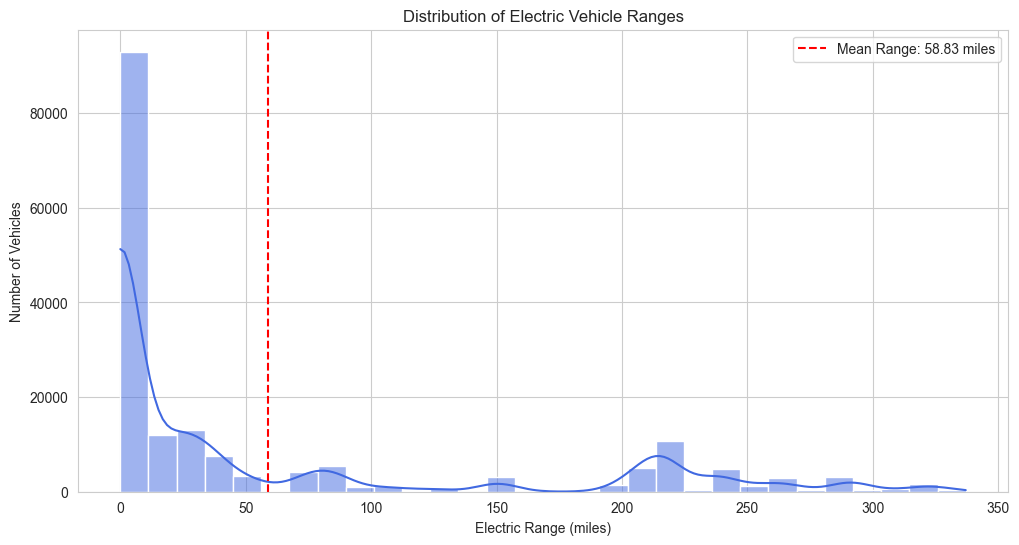

In [15]:
# analyzing the distribution of electric range
plt.figure(figsize=(12, 6))
sns.histplot(Ev_cleaned['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(Ev_cleaned['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {Ev_cleaned["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

#### Inferences: There is a high frequency of vehicles with a low electric range just before 50 miles, where the mean is around 58.83 miles per charge. The distribution is skewed to the right, with a long tail extending towards higher ranges, although the number of vehicles with higher ranges is much less frequent. Despite the presence of electric vehicles with ranges that extend up to around 350 miles, the majority of the vehicles have a range below the mean.

#### Let’s delve into the trend of electric ranges over model years, which can provide insights into how advancements in battery technology and vehicle design have influenced the electric range capabilities of electric vehicles over time. A positive trend in this analysis would indicate continuous improvements, offering consumers EVs with longer driving ranges and potentially addressing one of the major concerns regarding the EV market (range anxiety):

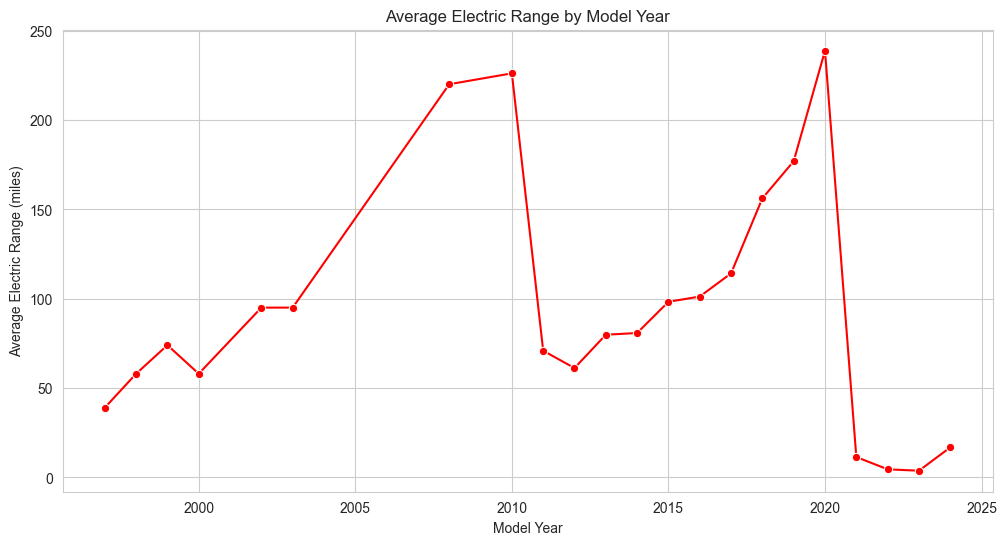

In [16]:

# calculating the average electric range by model year
average_range_by_year = Ev_cleaned.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='red')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

#### Inference: The above graph shows the progression of the average electric range of vehicles from around the year 2000 to 2024. Key findings from the graph:
- There is a general upward trend in the average electric range of EVs over the years, indicating improvements in technology and battery efficiency.
- There is a noticeable peak around the year 2020 when the average range reaches its highest point.
- Following 2020, there’s a significant drop in the average range, which could indicate that data for the following years might be incomplete or reflect the introduction of several lower-range models.
- After the sharp decline, there is a slight recovery in the average range in the most recent year shown on the graph.
The data suggest that while there have been fluctuations, the overall trend over the last two decades is in  favour of increasing the electric range of EVs


#### Next, let’s explore how electric ranges vary among the top manufacturers and models. This analysis can reveal how different manufacturers are addressing the crucial aspect of electric range and highlight which models stand out for their superior range capabilities:

         Make         Model  Electric Range
0       TESLA      ROADSTER      234.361702
1       TESLA       MODEL S      176.924499
2   CHEVROLET       BOLT EV      154.810732
3       TESLA       MODEL X      137.241028
4       TESLA       MODEL 3      109.512728
5      NISSAN          LEAF       84.148062
6   CHEVROLET         SPARK       82.000000
7   CHEVROLET          VOLT       45.356130
8   CHEVROLET   S-10 PICKUP       39.000000
9       TESLA       MODEL Y       19.179527
10  CHEVROLET     BLAZER EV        0.000000
11  CHEVROLET      BOLT EUV        0.000000
12  CHEVROLET  SILVERADO EV        0.000000
13     NISSAN         ARIYA        0.000000


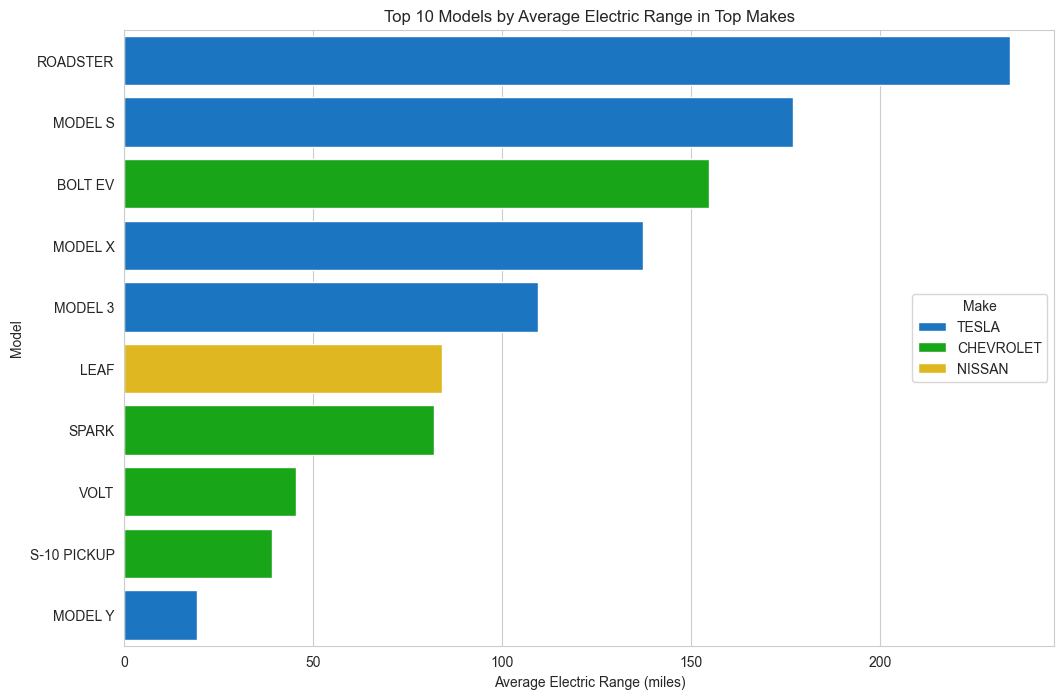

In [17]:
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()
print(average_range_by_model)

# the top 10 models with the highest average electric range
top_range_models = average_range_by_model.head(10)

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="nipy_spectral")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()

##### The TESLA ROADSTER has the highest average electric range among the models listed. TESLA’s models (ROADSTER, MODEL S, MODEL X, and MODEL 3) occupy the majority of the top positions, indicating that on average, TESLA’s vehicles have higher electric ranges. The CHEVROLET BOLT EV is an outlier among the CHEVROLET models, having a substantially higher range than the VOLT and S-10 PICKUP from the same maker. NISSAN’s LEAF and CHEVROLET’s SPARK are in the lower half of the chart, suggesting more modest average ranges.



### Estimated Market Size Analysis of Electric Vehicles in the United States
Now, let’s move forward towards finding the estimated market size of electric vehicles in the United States. I’ll first count the number of EVs registered every year:

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64


C:\Users\arjun\AppData\Local\Temp\ipykernel_10104\2341251469.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_registration_counts.index, y=ev_registration_counts.values, palette="turbo")


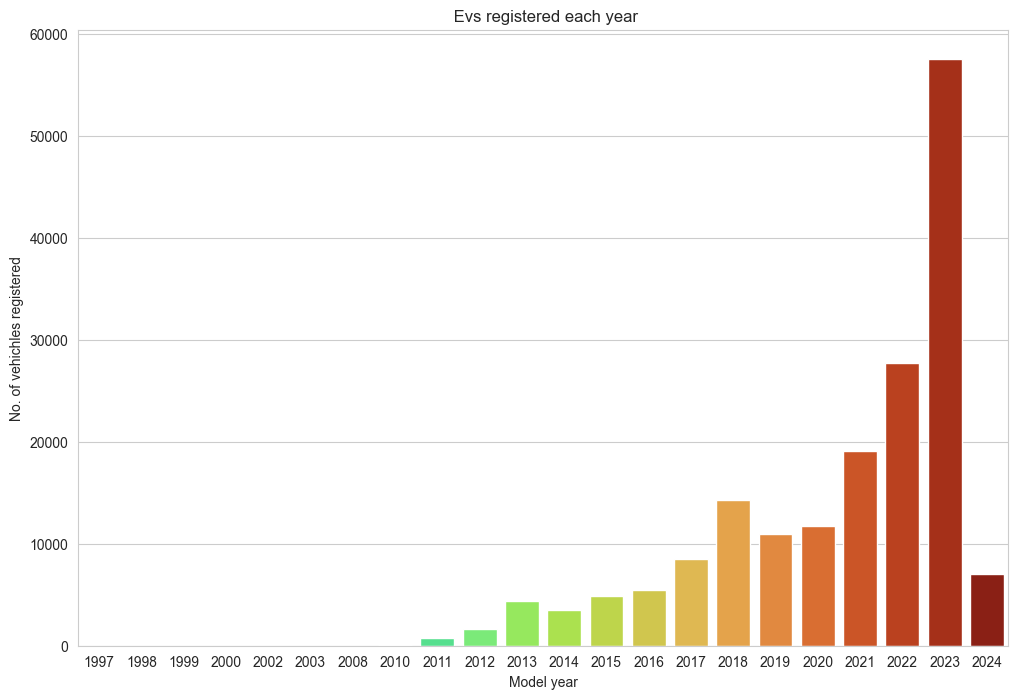

In [18]:
# calculate the number of EVs registered each year
ev_registration_counts = Ev_cleaned['Model Year'].value_counts().sort_index()
print(ev_registration_counts)
plt.figure(figsize=(12, 8))

sns.barplot(x=ev_registration_counts.index, y=ev_registration_counts.values, palette="turbo")

# sns.barplot(ev_registration_counts)

plt.title(' Evs registered each year')
plt.xlabel('Model year')
plt.ylabel('No. of vehichles registered')
plt.show()

#### To forecast the total number of EVs expected to be registered in 2024, we can use a growth rate based approach from previous complete years.

We’ll calculate the Compound Annual Growth Rate (CAGR) between a recent year with complete data (2023) and an earlier year to project the 2024 figures. Additionally, using this growth rate, we can estimate the market size for the next five years. Let’s proceed with these calculations:

In [19]:
from scipy.optimize import curve_fit
import numpy as np

# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{2024: 79079.20808938889, 2025: 119653.96274428742, 2026: 181047.22020265696, 2027: 273940.74706208805, 2028: 414497.01805382164, 2029: 627171.3128407666}


#### Now, let’s plot the estimated market size data:

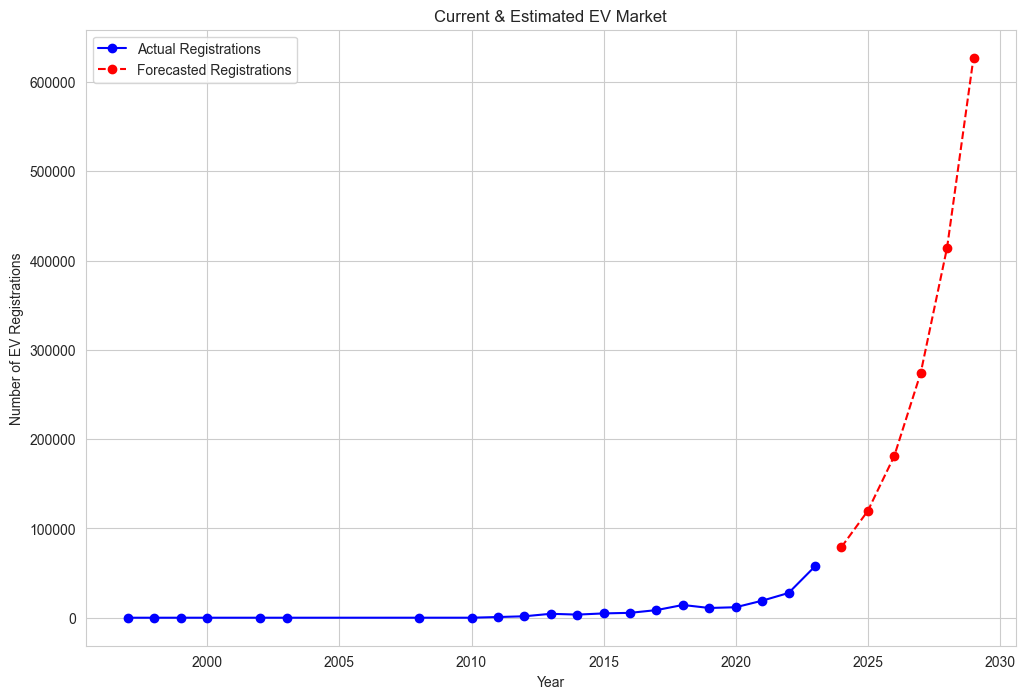

In [20]:
# prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()

#### Inferences: 
- The number of actual EV registrations remained relatively low and stable until around 2010, after which there was a consistent and steep upward trend, suggesting a significant increase in EV adoption.
The forecasted EV registrations predict an even more dramatic increase in the near future, with the number of registrations expected to rise sharply in the coming years.